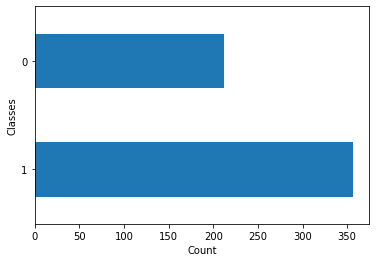

In [1]:
#import packages
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#load the breast cancer data
breast_cancer = sklearn.datasets.load_breast_cancer()

#convert the data to pandas dataframe.
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()
data.describe()

#plotting a graph to see class imbalance
data['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()



After fetching the X and Y variables, we will perform Min-Max scaling to bring all the features in the range 0 — 1. Before building the model, we will split the data so that we can train the model on training data and test the performance of the model on testing data. We will use sklearn’s train_test_split function to split the data in the ratio of 90:10 for training and testing respectively. Now that we are done with preprocessing steps, we can start building the model. We will build our model inside a class called perceptron.

In [0]:
# Data Standardization
from sklearn.preprocessing import MinMaxScaler
#perform scaling on the data.
X = data.drop("class", axis = 1)
Y = data["class"]

mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)


#train test split.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)



In [0]:
X_train.shape

(512, 30)

In [0]:
X_test.shape
X_test

array([[0.23280799, 0.16706121, 0.23716398, ..., 0.20762887, 0.22905579,
        0.31850977],
       [0.69899191, 0.3814677 , 0.71529265, ..., 0.63264605, 0.24995072,
        0.21999213],
       [0.24511335, 0.28136625, 0.23840785, ..., 0.19553265, 0.16577962,
        0.14593992],
       ...,
       [0.07648256, 0.30064254, 0.07117684, ..., 0.        , 0.31086142,
        0.17132363],
       [0.57641157, 0.57118701, 0.5694838 , ..., 0.64329897, 0.33372758,
        0.27653155],
       [0.18074684, 0.        , 0.1726211 , ..., 0.15817869, 0.10348906,
        0.14397219]])

In [0]:
w = np.ones(X.shape[1])
b = 0

def model(x):
    if np.dot(w, x) >= b:
      return 1
    else:
      return 0

In [0]:
#predictor to predict on the data based on w
def predict(X):
  Y = []
  for x in X:
    result = model(x)
    Y.append(result)
  return np.array(Y)

In [0]:
def fit_(X, Y, epochs = 1, lr = 1):
    global w
    global b
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    #for all epochs
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = model(x)
        if y == 1 and y_pred == 0:
          w = w + lr * x
          b = b - lr * 1
        elif y == 0 and y_pred == 1:
          w = w - lr * x
          b = b + lr * 1
          
      wt_matrix.append(w)    
      accuracy[i] = accuracy_score(predict(X), Y)
      return wt_matrix, accuracy[i]

In [0]:
training = fit_(X_train, Y_train)

In [0]:
predict = predict(X_test)
predict

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [0]:
_, accuracy = training


In [0]:
accuracy

0.939453125

In [0]:
#epochs = 10000 and lr = 0.3
# calculate the accuracy for 100 epochs with lr of 0.3




## Assignment

Derive the entire model under the class and plot the graph between Epoch vs Loss